<a href="https://colab.research.google.com/github/hmyrcmn/KUL/blob/main/multiLineDeciseneripynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout

!git clone https://github.com/hmyrcmn/KUL.git

# Veri yükleme
true_folder = '/content/KUL/truedata'

X_data = []
Y_labels = []

for filename in os.listdir(true_folder):
    data = np.genfromtxt(os.path.join(true_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels.append(1)
true_folder2 = '/content/KUL/truedata2'

for filename in os.listdir(true_folder2):
    data = np.genfromtxt(os.path.join(true_folder2, filename), delimiter=',')
    # X_data.append(data)
    X_data.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels.append(1)

false_folder = '/content/KUL/falsedata'
for filename in os.listdir(false_folder):
    data = np.genfromtxt(os.path.join(false_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels.append(0)

false_folder2 = '/content/KUL/falsedata2'
for filename in os.listdir(false_folder2):
    data = np.genfromtxt(os.path.join(false_folder2, filename), delimiter=',')
    # X_data.append(data)
    X_data.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels.append(0)

X_data = np.array(X_data)
Y_labels = np.array(Y_labels)
print("x_data shape: ",X_data.shape)
X_data

fatal: destination path 'KUL' already exists and is not an empty directory.
x_data shape:  (4000, 100, 1)


array([[[200.10677005],
        [199.41021706],
        [198.77841218],
        ...,
        [201.9444308 ],
        [203.36231439],
        [201.70454545]],

       [[200.3517316 ],
        [199.41021706],
        [198.77841218],
        ...,
        [201.9444308 ],
        [202.01229305],
        [201.70454545]],

       [[201.18903541],
        [199.41021706],
        [198.77841218],
        ...,
        [201.9444308 ],
        [202.01229305],
        [201.33357578]],

       ...,

       [[100.49097244],
        [102.82737612],
        [102.4746375 ],
        ...,
        [ 82.55299927],
        [ 83.59985508],
        [ 81.48558758]],

       [[100.49097244],
        [101.68549689],
        [102.4746375 ],
        ...,
        [ 82.55299927],
        [ 83.59985508],
        [ 83.11387519]],

       [[100.49097244],
        [101.68549689],
        [102.4746375 ],
        ...,
        [ 82.55299927],
        [ 83.59985508],
        [ 80.67742962]]])

In [14]:
# Verileri düzenleme ve normalleştirme
num_samples = len(X_data)
sequence_length = X_data.shape[1]
num_features = X_data.shape[2]

X_data_normalized = X_data.reshape(num_samples, sequence_length * num_features)

# Eğitim ve test setlerine bölme

X_train, X_test, y_train, y_test = train_test_split(X_data_normalized, Y_labels, test_size=0.2, random_state=42)

print("X_train.shape:",X_train.shape)
X_train

X_train.shape: (3200, 100)


array([[100.49097244, 101.26422372, 102.4746375 , ...,  82.55299927,
         84.85925616,  80.39108279],
       [200.3517316 , 199.41021706, 198.77841218, ..., 201.9444308 ,
        202.01229305, 201.70454545],
       [201.70454545, 201.53584893, 201.49991349, ..., 203.03753731,
        203.29109527, 203.73376623],
       ...,
       [200.3517316 , 199.41021706, 198.77841218, ..., 201.9444308 ,
        202.01229305, 201.70454545],
       [100.49097244, 104.34167099, 104.10014841, ...,  82.55299927,
         84.09842213,  82.81734163],
       [100.49097244, 101.68549689, 102.4746375 , ...,  83.83269193,
         83.59985508,  81.48558758]])

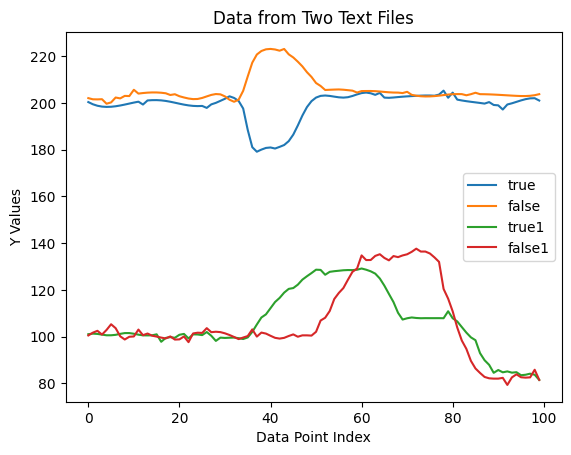

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the paths to your text files
true = '/content/KUL/truedata/smooth2001_0.txt'
false = '/content/KUL/falsedata/smooth2003_0.txt'
true1 = '/content/KUL/truedata2/smooth2004_0.txt'
false1 = '/content/KUL/falsedata2/smooth2005_0.txt'

# Load data from the first text file
data1 = np.genfromtxt(true, delimiter=',')
y_values1 = data1[:, 1]

# Load data from the second text file
data2 = np.genfromtxt(false, delimiter=',')
y_values2 = data2[:, 1]


# Load data from the first text file
data3 = np.genfromtxt(true1, delimiter=',')
y_values3 = data3[:, 1]

# Load data from the second text file
data4 = np.genfromtxt(false1, delimiter=',')
y_values4 = data4[:, 1]

# Plot the data from both files on the same graph
plt.plot(y_values1, label='true')
plt.plot(y_values2, label='false')
plt.plot(y_values3, label='true1')
plt.plot(y_values4, label='false1')

# Add labels and title
plt.xlabel('Data Point Index')
plt.ylabel('Y Values')
plt.title('Data from Two Text Files')
plt.legend()
plt.show()


In [16]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model = Sequential()
model.add(Conv1D(32, kernel_size=15, activation='sigmoid', input_shape=(100, 1)))
model.add(Flatten())

# model.add(Dense(200, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))

model.add(Dense(50, activation='sigmoid'))


model.add(Dense(2, activation='softmax'))



# Modeli derleme
# model.compile(optimizer='adam',loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model özetini yazdırma
model.summary()
# Modeli eğitme
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Modelin performansını değerlendirme
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


# Model özetini yazdırma
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 86, 32)            512       
                                                                 
 flatten_3 (Flatten)         (None, 2752)              0         
                                                                 
 dense_12 (Dense)            (None, 100)               275300    
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 50)                5050      
                                                                 
 dense_15 (Dense)            (None, 2)                 102       
                                                                 
Total params: 291064 (1.11 MB)
Trainable params: 29106

In [17]:
from sklearn.metrics import classification_report

# Modelin tahminlerini alın
y_pred_proba = model.predict(X_test)

# Her bir örnek için en yüksek olasılığa sahip sınıfı seçin
y_pred = np.argmax(y_pred_proba, axis=1)

# Sınıflandırma raporu
class_report = classification_report(y_test, y_pred)

print("Classification Report:")
print(class_report)

# Modelin özetini yazdırma
model.summary()


25/25 [==============================] - 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.49      0.65       378
           1       0.69      1.00      0.81       422

    accuracy                           0.76       800
   macro avg       0.84      0.74      0.73       800
weighted avg       0.83      0.76      0.74       800

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 86, 32)            512       
                                                                 
 flatten_3 (Flatten)         (None, 2752)              0         
                                                                 
 dense_12 (Dense)            (None, 100)               275300    
                                                                 
 dense_13 (Dense)            (None, 100)       

25/25 [==============================] - 0s 5ms/step
conf_matrix: [[184 194]
 [  0 422]]


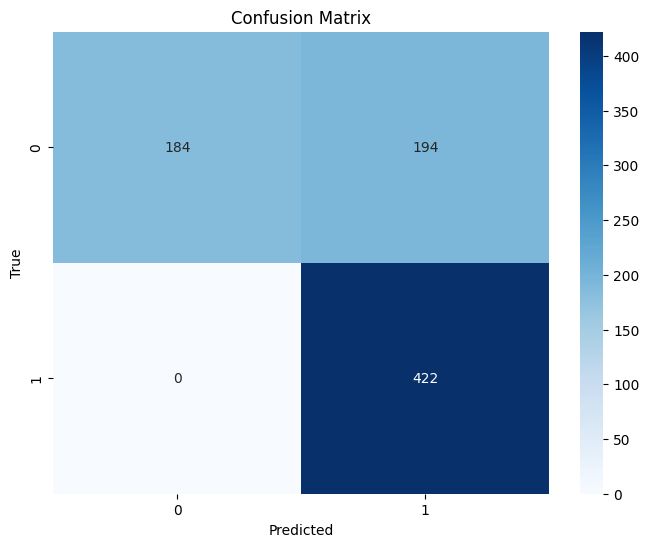

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Modelin tahminlerini alın
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba[:, 1] > 0.5).astype(int)  # Eşik değeri üzerinden sınıflara dönüştürme

# Confusion matrix oluşturun
conf_matrix = confusion_matrix(y_test, y_pred)
print("conf_matrix:",conf_matrix)
# Confusion matrix'i seaborn ile görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [19]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout


# Veri yükleme
true_folder = '/content/KUL/errors/true'
X_data2= []
Y_labels2 = []

for filename in os.listdir(true_folder):
    data2 = np.genfromtxt(os.path.join(true_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data2.append(data2[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels2.append(1)
true_folder2 = '/content/KUL/errors/true2'

for filename in os.listdir(true_folder2):
    data2 = np.genfromtxt(os.path.join(true_folder2, filename), delimiter=',')
    # X_data.append(data)
    X_data2.append(data2[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels2.append(1)
false_folder = '/content/KUL/errors/false'
for filename in os.listdir(false_folder):

    data2 = np.genfromtxt(os.path.join(false_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data2.append(data2[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels2.append(0)
false_folder2= '/content/KUL/errors/false2'
for filename in os.listdir(false_folder2):

    data2 = np.genfromtxt(os.path.join(false_folder2, filename), delimiter=',')
    # X_data.append(data)
    X_data2.append(data2[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels2.append(0)

X_data2= np.array(X_data2)
Y_labels2 = np.array(Y_labels2)
print("x_data shape: ",X_data2.shape)


# Verileri düzenleme ve normalleştirme
num_samples = len(X_data2)
sequence_length = X_data2.shape[1]
num_features = X_data.shape[2]

X_data_normalized2 = X_data2.reshape(num_samples, sequence_length * num_features)
print("y:",Y_labels2.shape)
Y_labels2





x_data shape:  (20, 100, 1)
y: (20,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
# Model ile tahmin yapma
predictions = model.predict(X_data_normalized2)
# Tahmin sonuçlarını eşik değere göre ikili sınıflara dönüştürme
binary_predictions = (predictions > 0.5).astype(int)
# print(":binary_predictions",binary_predictions)
# Her bir örnek için tahmin edilen sınıfı ve olasılığı yazdırma
for i in range(len(binary_predictions)):
    predicted_class = binary_predictions[i][1]  # Sadece ilk sınıfın tahminini al
    probability = predictions[i][predicted_class]  # Tahmin edilen sınıfa ait olasılığı al
    print(f"Sample {i + 1}: Predicted Class: {predicted_class}, Probability: {probability:.4f}")

# binary_predictions

1/1 [==============================] - 0s 98ms/step
Sample 1: Predicted Class: 1, Probability: 0.6835
Sample 2: Predicted Class: 1, Probability: 0.6835
Sample 3: Predicted Class: 1, Probability: 0.6834
Sample 4: Predicted Class: 1, Probability: 0.6830
Sample 5: Predicted Class: 1, Probability: 0.6832
Sample 6: Predicted Class: 1, Probability: 0.6494
Sample 7: Predicted Class: 1, Probability: 0.6498
Sample 8: Predicted Class: 1, Probability: 0.6495
Sample 9: Predicted Class: 1, Probability: 0.6490
Sample 10: Predicted Class: 1, Probability: 0.6495
Sample 11: Predicted Class: 1, Probability: 0.6206
Sample 12: Predicted Class: 1, Probability: 0.6208
Sample 13: Predicted Class: 1, Probability: 0.6200
Sample 14: Predicted Class: 1, Probability: 0.6207
Sample 15: Predicted Class: 1, Probability: 0.6206
Sample 16: Predicted Class: 0, Probability: 0.7878
Sample 17: Predicted Class: 0, Probability: 0.7866
Sample 18: Predicted Class: 0, Probability: 0.7860
Sample 19: Predicted Class: 0, Probabil